# Solutions exercise 3

<img src="resources/gradient_descent.gif"  />

# Topic 1: Implementing Gradient descent and plotting resulting regression line and data points
Use the data $X$: feature vector of data points and $Y$:=label vector from below for the following assignments:

#### 1. Implement mse loss function, compare your results with sklearns mse function
documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$MSE_{matrix} = \frac{1}{N} \lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} $


#### HINT: 
---
$\lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} = (\mathbf{X}w - \mathbf{y})^{T}(\mathbf{X}w - \mathbf{y})$ 
#### 2. Implement gradient descent algorithm
#### Algorithm pseudo-code
---
```python
Initialize w(0)=100
for step in range(training steps):
    w(t+1) = w(t) - alpha * grad( J( w(t) ) ) 
    mse = mse(w(t+1))
    print(mse)
```
#### Hints: 
---
- Start with a w value of 100
- grad( J( w(t) ) ) = ($\nabla_{w_{1}} MSE$)

$\nabla_{w_{1}} MSE = \frac{w_{1}\mathbf{X^{T}X} - \mathbf{X^{T}y}}{N}$
##### 3. Run gradient descent for 100 training iterations with a learning rate alpha = [1, 0.01, 0.005] and plot the mse-error(y-axis) over the number of training iterations(x-axis) for each alpha

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Given data
np.random.seed(seed=42)

X = 2.5 * np.random.rand(100) + 1.5   
res = 0.2 * np.random.randn(100)
Y = 0.3 * X + res

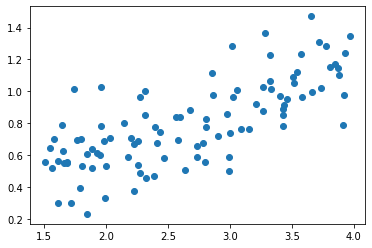

In [3]:
plt.scatter(X,Y)

In [3]:
def mse(X, w1, Y_true):
    return np.dot((X*w1 - Y_true).T, (X*w1 - Y_true)) / len(X)

In [4]:
mse(X,0.5,Y)

0.34951755241923843

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
mean_squared_error(Y, X*0.5)

0.34951755241923843

In [7]:
def gradient_descent(X, Y, training_itrs, alpha):
    
    w = 100
    mse_errors = []
    
    for i in range(training_itrs):
        
        delta_J = (1/(len(X)) * (w * np.dot(X.T, X) - np.dot(X.T, Y)))
        w = w - alpha * delta_J
        mse_errors.append(mse(X, w, Y))
        
    plt.plot(mse_errors)
    
    return w

0.3301376414970657

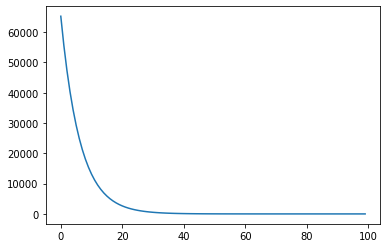

In [8]:
gradient_descent(X, Y, 100, 0.01)

# Topic 2: Multiple Linear Regression on Real estate data

### Please work on the following assignments:
---
##### 1. Split data into training and test set
- shuffle the data
- 80 % training set, 20 % test set
- use numpy
- at the end you should have: x_train, y_train, x_test, y_test

##### 2. Separate labels(house price) from rest of the data
##### 3. Fill in missing values and drop categorical ones
##### 4. Train model using the following regression method from sklearn:

- Linear Regression

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

##### 5. Compute MSE and residual error on test set
### ***Optional*** Assignments: 
##### 6. Compute the average house price
##### 7. Compute the max. house prize
##### 8. Compute the min. house prize
##### 9. Compute histogram of house prices
##### 10. Compute percentage of house prices higher than 1 mio. and plot histogram of those above 1 mio.
##### 11. Which object offers the most rooms ? Whats the prize ?
##### 12. How much do you, on average, pay for a room ? 

### Just FYI:
---
MSE formula for multidimensional linear regression:


Loss = $\frac{1}{2N} \lvert\lvert \mathbf{X}\mathbf{w}-\mathbf{y} \lvert\lvert^{2}$

$\mathbf{X}\epsilon\mathbb{R^{Nxd}}$,
$\mathbf{w}\epsilon\mathbb{R^{dx1}}$,
$\mathbf{y}\epsilon\mathbb{R^{Nx1}}$

In [25]:
data = pd.read_csv('data/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

### Solution 1-3

In [26]:
# using pandas
x_train, y_train, x_test, y_test = train_test_split(data.iloc[:,:5], data.iloc[:,5], test_size=0.2, shuffle=True)

In [27]:
# numpy
indices = np.random.permutation(data.shape[0])
train_indices = indices[:int(len(data)*0.8)] 
test_indices = indices[int(len(data)*0.8):]

x_train, y_train, x_test, y_test = data.iloc[train_indices,:5], data.iloc[train_indices,5], data.iloc[test_indices,:5], data.iloc[test_indices,5]

### Solution 4

In [13]:
model = LinearRegression()
model = model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print(f'Train residuals: {np.sum(y_train - train_predictions)}')
print(f'Test residuals: {np.sum(y_test - test_predictions)}')

print(f'Train MSE: {mean_squared_error(y_train, train_predictions)}')
print(f'Test MSE: {mean_squared_error(y_test, test_predictions)}')

Train residuals: -4.4051557779312134e-07
Test residuals: -1107476.729759893
Train MSE: 10342070149.107592
Test MSE: 9752283025.173557


In [14]:
x_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
227,76175.493928,4.524141,9.524974,4.28,30760.994956
4352,55815.568724,7.151591,6.002938,2.35,42961.764197
1128,94085.472984,6.305651,9.108893,5.15,31011.366807
2153,78286.517912,4.236881,7.465136,5.29,42425.776352
2331,79817.665761,6.019475,8.073787,5.41,31765.901385


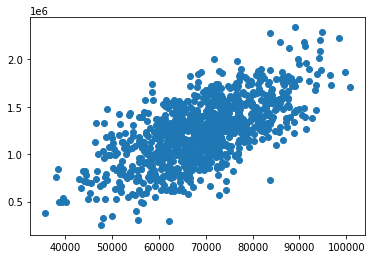

In [15]:
plt.scatter(x_test.iloc[:,0], test_predictions)

### Solutions 6-8

In [16]:
# solution 6, 7, 8
max_prize = data['Price'].max()
min_prize = data['Price'].min()
avg_prize = data['Price'].mean()

print(max_prize)
print(min_prize)
print(avg_prize)

2469065.5941747027
15938.657923287848
1232072.654142357


### Solution 9

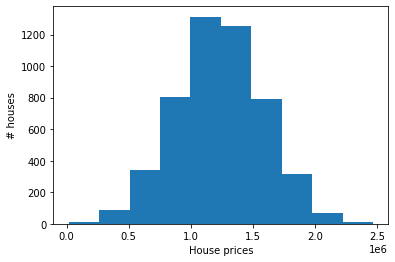

In [17]:
# solution 9
plt.hist(data['Price'])
plt.xlabel('House prices')
plt.ylabel('# houses')
plt.show()

### Solution 10

Percentage of houses that cost more than 1mio.: 74.74%


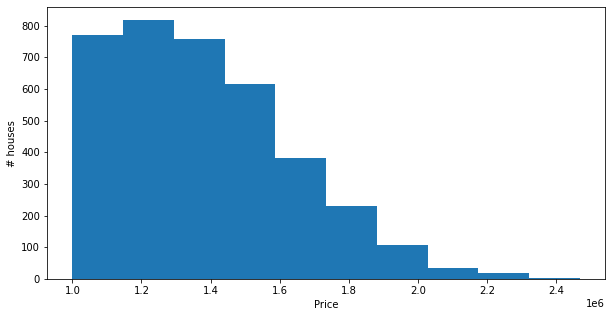

In [18]:
# solution 10
above_1mio = data[data['Price'] > 1000000]['Price']

per_above_1mio = len(above_1mio) / data.shape[0]

print(f'Percentage of houses that cost more than 1mio.: {100*per_above_1mio}%')

plt.figure(figsize=(10,5))
plt.hist(above_1mio)
plt.xlabel('Price')
plt.ylabel('# houses')
plt.show()

### Solution 11

In [19]:
data.iloc[np.argmax(data['Avg. Area Number of Rooms'])]

Avg. Area Income                                                    69505.1
Avg. Area House Age                                                 7.35235
Avg. Area Number of Rooms                                           10.7596
Avg. Area Number of Bedrooms                                           5.14
Area Population                                                     48112.2
Price                                                           2.23529e+06
Address                         0665 Dawn Overpass\nEast Sarabury, CA 82390
Name: 1536, dtype: object

### Solution 12

In [20]:
np.sum(data['Price'] / data['Avg. Area Number of Rooms']) / data.shape[0]

177646.06835283132

### (Optional) Topic 3: Implement a Multiple Linear Regression by hand:

Write a class that has the following methods:

- fit(X,Y): Should fit the model weights using feature matrix X and label vector y. Use closed form solution to find perfect w-vector.
- predict(X): Should make predictions label predictions for X.
- score(X,Y): Should make label predictions on X, and mse score using the label information Y and the predictions.
- train and evaluate your model on the wine dataset

In [62]:
class LinearRegression():
    
    def __init__(self):
        self.w = None
        
    def fit(self,X,y):
        
        # Compute closed form solution
        w_opt = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T, y))
        
        self.w = w_opt
    
    def predict(self,X):
        
        predictions = np.dot(X,self.w)
        
        return predictions
    
    def mse_score(self,X,y):
        
        predictions = self.predict(X)
        
        return mean_squared_error(y, predictions)
        
        

In [63]:
x_train_with_bias = np.hstack([np.ones((x_train.shape[0], 1)), x_train])

In [64]:
test_model = LinearRegression()

In [65]:
test_model.fit(x_train_with_bias, y_train)

In [67]:
test_model.mse_score(x_train_with_bias,y_train)

10199650208.09409

In [ ]:
10342070149